In [1]:
## importDataset
## Prepare dataset for training
## Assumes png filenames in X have been corrected to remove suffix 1

# TODO:
## 1) Input pipeline for Kodak
## 2) Implement low-level model - Done
## 3) Train low-level on Kodak for demosaic-denoising
## 4) Implement high level model and connect with low-level
## -------a) Linear regression for W weights initialization
## -------b) Finish preprocessing
## -------c) Implement minimization objective
## -------d) Decide on metric
## 5) Train full ISP
# Note: Full ISP is trained only on low exposure or high exposure

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
import os
import tensorflow as tf
#import pathlib
#import cv2
#import rawpy
import glob
import matplotlib.pyplot as plt

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 3 #TODO: increase 

In [15]:
def parse_image(filepathX,filepathY):
    #filepathX = filepaths[0]
    #filepathY = filepaths[1]
    imageX = tf.io.read_file(filepathX)  
    imageY = tf.io.read_file(filepathY)  

    #image = tf.image.decode_png(image) if tf.strings.split(filepath,sep='.').numpy[-1] == b'png'[-1] else tf.image.decode_jpeg(image) 
    imageX = tf.image.decode_png(imageX)
    imageX = tf.image.convert_image_dtype(imageX, tf.float32)
    imageY = tf.image.decode_jpeg(imageY)
    imageY = tf.image.convert_image_dtype(imageY, tf.float32)
    #image = tf.image.resize(imageX, [width, height]) # Might want to use this during inference and if we train on other data
    return imageX, imageY

In [5]:
#TODO : 
def preprocess(imageX, imageY):
    # bilinear demosaicing by rawpy
    # enforce landscape orientation
    # transform each image to a batch of patches of specific dimension
    # random flips horizontal vertical
    # make sure return result is compatible with BATCH_SIZE and feeding into network
    

    return 

In [4]:
DATAX_PATH = os.path.join(os.getcwd(),'X_dem') #path to PNG, demosaiced DNG directory
DATAY_PATH = os.path.join(os.getcwd(),'Y') #path to ground truth JPEG directory

In [5]:
fnames = [name.split('.')[-2] for name in os.listdir(DATAX_PATH)] # unique data names (no file extensions or path hierarchy)

# TODO: split train-test-val here before loading actual images 90 train, 10 test, 10 validation
# TODO: Decide if will do cross validation, or use same values as in the paper
# TODO: make sure []_medium_exposure and []_short_exposure pairs end together in either set

In [6]:
# step 1: Lists of paths to each training data point and ground truth
X_file_paths = tf.constant([os.path.join(DATAX_PATH,xname+'.png') for xname in fnames]) # this should be same as shutil
Y_file_paths = tf.constant([os.path.join(DATAY_PATH,xname+'.jpg') for xname in fnames])

In [9]:
# step 2: create a dataset returning slices of `filenames`

list_dsX = tf.data.Dataset.list_files(X_file_paths, seed=42) # seed for random but consistent shuffling #TODO: vs ds.shuffle(buffer)  ??
list_dsY = tf.data.Dataset.list_files(Y_file_paths, seed=42)
list_ds = tf.data.Dataset.zip((list_dsX, list_dsY))

In [16]:
# Step 3 new
labeled_ds = list_ds.map(parse_image, num_parallel_calls=AUTOTUNE)

In [20]:
#dataset = prepare_for_training(dataset) # If everything is correct, this is the dataset to be used in training
dataset = labeled_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)

NameError: name 'dataset' is not defined

In [21]:
dataset = dataset.batch(BATCH_SIZE)
#TODO: ds = ds.cache() 
#TODO maybe: ds.shuffle
dataset = dataset.prefetch(1)

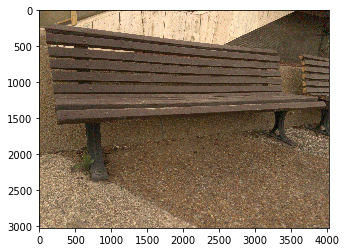

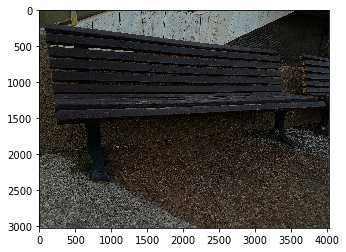

In [17]:
for image,label in labeled_ds.take(1):
    plt.figure()
    plt.imshow(image)
    plt.figure()
    plt.imshow(label)

In [25]:
X_file_paths[0:4]

<tf.Tensor: id=639, shape=(4,), dtype=string, numpy=
array([b'/Users/stamatios/Classes/EE193-HIP/final/X_dem/20161109_135848_short_exposure.png',
       b'/Users/stamatios/Classes/EE193-HIP/final/X_dem/20161110_123443_short_exposure.png',
       b'/Users/stamatios/Classes/EE193-HIP/final/X_dem/20161109_134936_medium_exposure.png',
       b'/Users/stamatios/Classes/EE193-HIP/final/X_dem/20161109_183259_medium_exposure.png'],
      dtype=object)>

In [17]:
Y_file_paths[0:4]

[<tf.Tensor: id=221, shape=(), dtype=string, numpy=b'/Users/stamatios/Classes/EE193-HIP/final/Y/20161109_135848_short_exposure.jpg'>,
 <tf.Tensor: id=222, shape=(), dtype=string, numpy=b'/Users/stamatios/Classes/EE193-HIP/final/Y/20161110_123443_short_exposure.jpg'>,
 <tf.Tensor: id=223, shape=(), dtype=string, numpy=b'/Users/stamatios/Classes/EE193-HIP/final/Y/20161109_134936_medium_exposure.jpg'>,
 <tf.Tensor: id=224, shape=(), dtype=string, numpy=b'/Users/stamatios/Classes/EE193-HIP/final/Y/20161109_183259_medium_exposure.jpg'>]